In [8]:
pwd

'/workspaces/deeplearningfromscratch/ch03'

In [16]:
os.path.join(os.getcwd(), "..")

'/workspaces/deeplearningfromscratch/ch03/..'

In [14]:
parent_dir

'/workspaces/deeplearningfromscratch'

Converting train-images-idx3-ubyte.gz to NumPy Array ...


Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
5
(784,)
(28, 28)


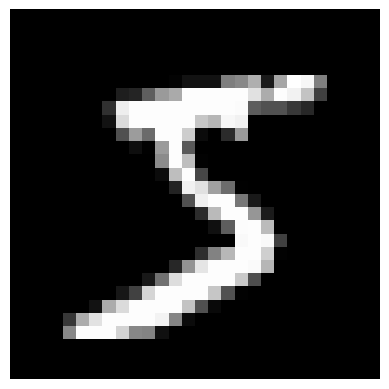

In [17]:
# coding: utf-8
import sys
import os
import numpy as np
import matplotlib.pyplot as plt


parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(os.path.join(parent_dir, "dataset"))
from mnist import load_mnist

# img_show 함수 정의
def img_show(img):
    plt.imshow(img, cmap='gray')  # 이미지를 그레이스케일로 표시
    plt.axis('off')  # 축을 숨김
    plt.show()

# MNIST 데이터 로드
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)  # Jupyter에서 이미지를 바로 출력


In [4]:
import pickle

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open(os.path.join('/workspaces/deep-learning-from-scratch/ch03/', 'sample_weight.pkl'), 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    # print(x.shape)
    # print(W1.shape)
    # print(b1.shape)
    # print(W2.shape)
    # print(b2.shape)
    # print(W3.shape)
    # print(b3.shape)
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t= get_data()
network=init_network()

accuracy_cnt=0
for i in range(len(x)):
    y=predict(network,x[i])
    p=np.argmax(y) #이미지에 관련된 정보를 알 수 없는 은닉층에 넣고 그 결과를 출력층에 넣어서 결과를 출력(숫자임)
    #print(p)
    #print(t[i])#원래부터 가지고 있던 정답
    if p==t[i]:
        accuracy_cnt+=1

print("Accuracy:"+str(float(accuracy_cnt)/len(x)))        

NameError: name 'load_mnist' is not defined

In [24]:
import numpy as np

x, t = get_data()
network = init_network()

batch_size = 100  # 배치 크기
accuracy_cnt = 0    # 정확도 카운트

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accurency:" + str(float(accuracy_cnt)/len(x)))



(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
(100, 784)
(784, 50)
(50,)
(50, 100)
(10

In [1]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [1]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size,t)]+1e-7)) / batch_size